In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

get_ipython().run_line_magic('matplotlib', 'inline')

import copy
import os



In [2]:
data_12 = "bpic2012"
df_adaptive_12 = pd.read_csv("./results_conformal/%s/df_final_adaptive_all.csv" % data_12, sep=';')
df_adaptive_12.name =  "adaptive_12"
df_class_12 = pd.read_csv("./results_conformal/%s/df_final_classBalanced_all.csv" % data_12, sep=';')
df_class_12.name = "class_12"
df_naive_12 = pd.read_csv("./results_conformal/%s/df_final_naive_all.csv" % data_12, sep=';')
df_naive_12.name = "naive_12"


data_17 = "bpic2017"
df_adaptive_17 = pd.read_csv("./results_conformal/%s/df_final_adaptive_all.csv" % data_17, sep=';')
df_adaptive_17.name =  "Adaptive_17"
df_class_17 = pd.read_csv("./results_conformal/%s/df_final_classBalanced_all.csv" % data_17, sep=';')
df_class_17.name = "class_17"
df_naive_17 = pd.read_csv("./results_conformal/%s/df_final_naive_all.csv" % data_17, sep=';')
df_naive_17.name = "naive_17"

actual_12 = list(set(df_adaptive_12[df_adaptive_12.actual==1]['case_id']))
actual_17 = list(set(df_adaptive_17[df_adaptive_17.actual==1]['case_id']))

bpic2012
predictive
['predictive_proba_conformal_alpha=0.9_1', 'predictive_proba_conformal_alpha=0.4_1', 'predictive_proba_alpha=0.9_1', 'predictive_proba_naive_conformal_alpha=0.4_1', 'predictive_proba_uncer_alpha=0.9_1']

bpic2012
current
['current_proba_cate_uncer_alpha=0.9_1', 'current_proba_class_cate_conformal_alpha=0.4_1', 'current_proba_cate_alpha=0.9_1', 'current_proba_cate_conformal_alpha=0.4_1', 'current_proba_cate_conformal_alpha=0.9_1']

bpic2012
future
['future_proba_cate_alpha=0.9_1', 'future_proba_naive_cate_conformal_alpha=0.4_1', 'future_proba_cate_uncer_alpha=0.9_1', 'future_proba_cate_conformal_alpha=0.9_1', 'future_proba_cate_conformal_alpha=0.4_1']

bpic2017
predictive
['predictive_proba_conformal_alpha=0.2_1', 'predictive_proba_classbalanced_conformal_alpha=0.2_1', 'predictive_proba_conformal_alpha=0.9_1', 'predictive_proba_alpha=0.9_1', 'predictive_proba_uncer_alpha=0.9_1']

bpic2017
current
['current_proba_cate_uncer_alpha=0.9_1', 'current_proba_cate_alpha=0.9_

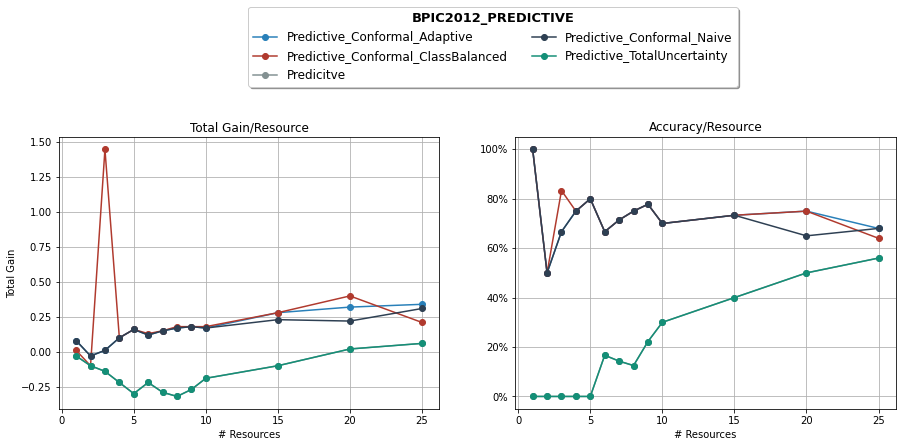

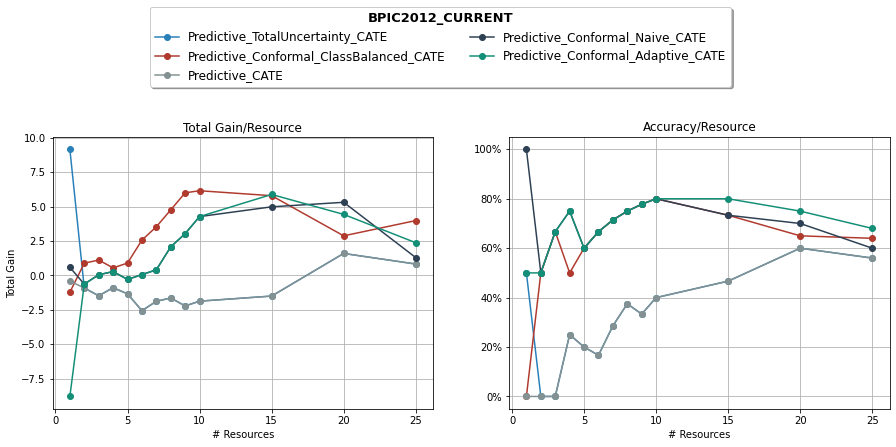

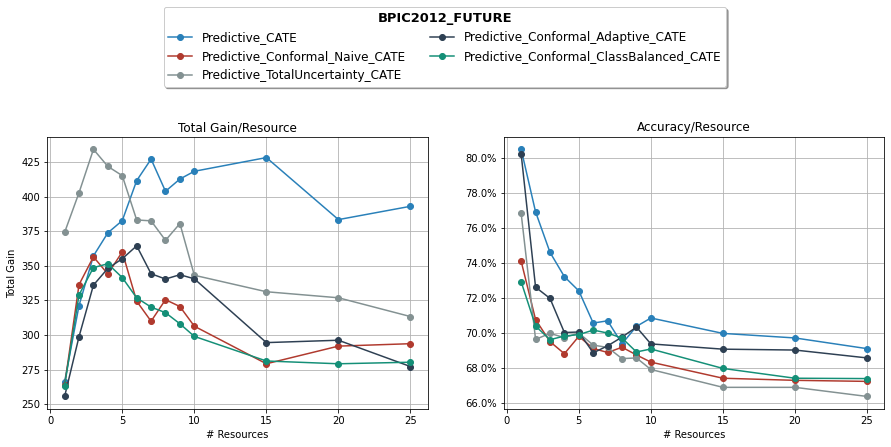

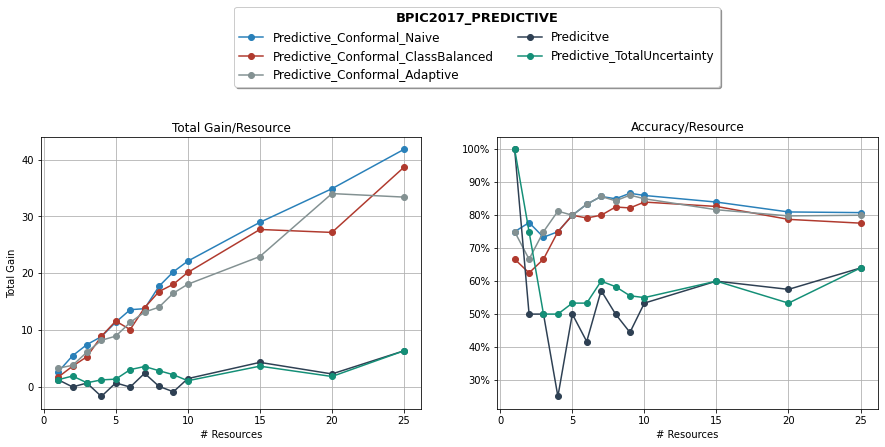

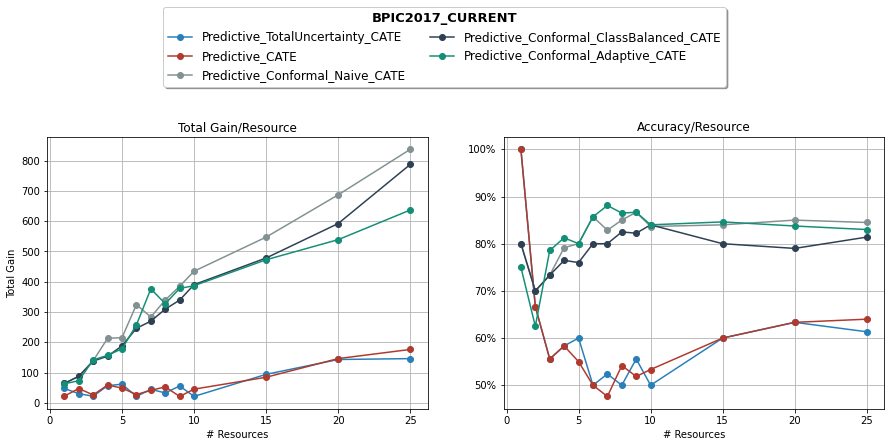

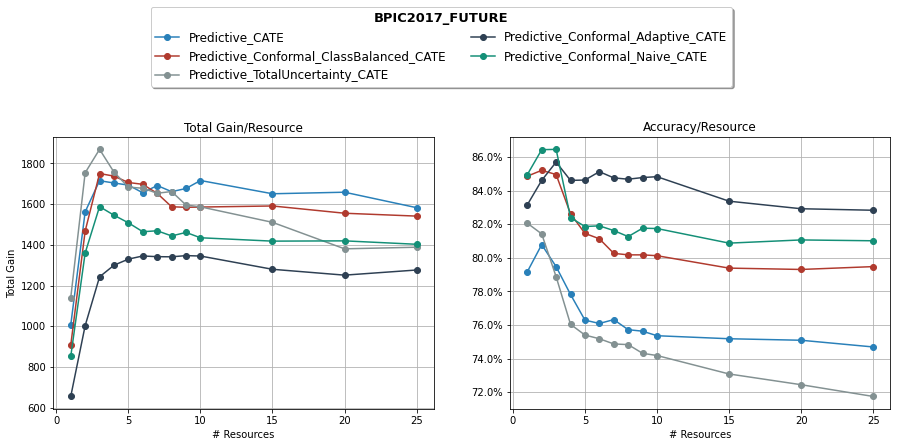

In [7]:
import warnings
warnings.filterwarnings("ignore")

datasetss = ["bpic2012", "bpic2017"]
m = ["predictive", "current", "future"]#

for datasets in datasetss:
    for mode in m:        

        datasets = datasets
        #method = 'adaptive'
        mode = mode

        folder = './results_runtime/%s/%s/'%(datasets,mode)

        sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]
        print(datasets)
        print(mode)
        print(sub_folders)
        print("")
        
        if datasets=="bpic2017":
            actual = actual_17
        else:
            actual = actual_12
            
        dfs_fixed = []
        dfs_fixed_new = []
        resources = [1,2,3,4,5,6,7,8,9,10, 15,20,25,30,50,100]

        #cost_t1= []
        dict_all = {}
        all_data =sub_folders

        for c in all_data:
            #print(c)
            for r in resources:
                try:

                    try:
                        pass
                        df = pd.read_csv("./results_runtime/"+datasets+"/"+mode+"/"+c+"/0.75/"+"adaptive"+"_"+str(r)+".csv"  , sep=';')
                        co = c+"_Adaptive"
                        dict_all[co]=[]
                    except:
                        pass

                    try:
                        pass
                        df = pd.read_csv("./results_runtime/"+datasets+"/"+mode+"/"+c+"/0.75/"+"classBalanced"+"_"+str(r)+".csv"  , sep=';')
                        co = c+"_ClassBalanced"
                        dict_all[co]=[]
                    except:
                        pass

                    try:
                        pass
                        df = pd.read_csv("./results_runtime/"+datasets+"/"+mode+"/"+c+"/0.75/"+"naive"+"_"+str(r)+".csv"  , sep=';')
                        co = c+"_Naive"
                        dict_all[co]=[]
                    except:
                        pass

                    if mode =="predictive" or mode =="current":
                        df.columns = ["case_id", "gain", "prefix_nr", "Activity"]
                    elif mode =="future":   
                        df.columns = ["case_id", "adjgain", "prefix_nr", "Activity", "gain", "e_gain"]
                    else:
                        print("no valid mode")



                    df['condition_mode'] = co
                    dfs_fixed.append(df)
                    df = df[:-1]
                    df.name = r
                    dfs_fixed_new.append(df)
                except: 
                    print("notvalid")
                
        results_dict = copy.deepcopy(dict_all)

        for df in dfs_fixed_new:
            nr_res = df.name
            mod = df.condition_mode[0]
            treated = list(set(df.case_id))
            matched = list(set(actual).intersection(treated)) 

            #print(f"nr of treated cases: {len(treated)}")
            #print(f"nr of actual negative cases : {len(actual)}")
            #print(f"nr of treated actual negative cases: {len(matched)}")
            #print(f"{(len(matched)/len(treated)*100)} %\n")

            results_dict[mod].append(np.round((len(matched)/len(treated)*100),2))

        acc_df = pd.DataFrame(results_dict, index=resources)
        
        for df in dfs_fixed_new:
            for row in df.to_records("record"):
                case_id = row.case_id
                if case_id in actual:
                    pass
                else:
                    df.loc[df['case_id'] == case_id, 'gain'] = np.multiply(np.multiply(row.gain, -1),1)

        def get_dicts(dfs):
    
            mydict = copy.deepcopy(dict_all)
            i =0

            for df in dfs: 
                #print(f"nrTreatedCases: {len(df.case_id)}, totalGain: {df.gain.sum()}, nr_res: {resources[i]}")
                #print(f"Gain/resource: {(df.gain.sum()/len(df.case_id))/(resources[i])}")
                #print(f"Gain/treatment: {df.gain.sum()/len(df.case_id)}\n")

                mydict[df.condition_mode[0]].append([df.name, df.condition_mode[0], np.round(df.gain.sum(), 2),\
                                                     np.round(df.gain.sum()/len(df.case_id), 2), \
                                                     len(df.case_id), (df.gain.sum()/len(df.case_id))/(resources[i]),
                                                    len(df.case_id)])#, 
                i+=1
                if i==len(resources):
                    i=0

            return mydict

        mydict_fixed = get_dicts(dfs_fixed_new,)

        final_dfs = []

        conditionss= copy.deepcopy(dict_all)

        for c in conditionss:
            #print(c)
            try:
                if pd.DataFrame(mydict_fixed[c]).empty:
                    print("EmptyDF")
                else:
                    final_dfs.append(pd.DataFrame(mydict_fixed[c], columns=['nr_res', "mode_condition", "total_gain", \
                                                                            "gain_per_treatment", "nrtreated_cases","gain_per_Res",\
                                                                           "nrTreated"]))

            except: 
                print("No valid ")
        
        
        from matplotlib.ticker import FuncFormatter
        import warnings
        warnings.simplefilter("ignore", UserWarning)
        pd.options.plotting.backend = 'holoviews'
        pd.set_option('plotting.backend', 'hvplot')

        fig, (ax1, ax3)  = plt.subplots(1,2, figsize=(15, 5))

        zzzz = 13
        x = final_dfs[0].nr_res[:zzzz]
        conditions = conditionss


        colors2 = ['#2980B9',  "#b03a2e",  "#839192", "#2e4053", '#148f77',"#884ea0" ,
                  "#641e16","#d4ac0d", "#0b5345", "#82e0aa", "#e59866", 
                   "#597EBA", "#283807", "#DE0100"]
        i =0
        vals=[0.1, 0.2,0.2,0.3, 0.1]
        j=0
        for df in final_dfs:
            if df.mode_condition[0].split("_")[2]=="conformal" or df.mode_condition[0].split("_")[4]=="conformal"\
            or df.mode_condition[0].split("_")[3]=="conformal":
                if df.mode_condition[0].split("_")[2]=="cate" or df.mode_condition[0].split("_")[3]=="cate":
                    lab = "Predictive"+"_Conformal"+"_"+df.mode_condition[0].split("_")[-1]+"_CATE"
                else:
                    lab = "Predictive"+"_Conformal"+"_"+df.mode_condition[0].split("_")[-1]

                
            elif df.mode_condition[0].split("_")[2]=="uncer" or df.mode_condition[0].split("_")[3]=="uncer":
                if df.mode_condition[0].split("_")[2]=="cate" or df.mode_condition[0].split("_")[3]=="cate":
                    lab = "Predictive"+"_TotalUncertainty"+"_CATE"
                else:
                    lab = "Predictive"+"_TotalUncertainty"
            elif df.mode_condition[0].split("_")[2]=="cate":
                lab = "Predictive"+"_CATE"
            else:
                lab = "Predicitve"


            
            ax1.plot(x,df.total_gain[:zzzz], 'bo-',alpha=1, color=colors2[i], label=lab)
            ax3.plot(x,acc_df[df.mode_condition[0]][:zzzz], 'bo-', alpha=1, color=colors2[i],  label=lab)
            i+=1
            j+=1

        from matplotlib import pyplot as plt, font_manager as fm

        legend = ax1.legend(bbox_to_anchor=(1.85, 1.4),
                          fancybox=True, shadow=True, 
                            ncol=2,title_fontsize=13, prop={'size': 12,},)

        legend = ax1.legend(bbox_to_anchor=(1.8, 1.5),
                          fancybox=True, shadow=True, ncol=2,title_fontsize=13, title=  datasets.upper() + "_" +mode.upper(), 
                            prop={'size': 12,},)

        ax1.grid()
        ax3.grid()

        ax1.set_title("Total Gain/Resource")
        ax3.set_title('Accuracy/Resource')


        ax1.set_xlabel('# Resources')
        ax3.set_xlabel('# Resources')

        title = legend.get_title()
        title.set_weight("bold")

        ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax1.set_ylabel('Total Gain')
